# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url=f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | kingston
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | altar
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | utrik
Processing Record 8 of Set 1 | immokalee
Processing Record 9 of Set 1 | kerikeri
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | gallivare
City not found. Skipping...
Processing Record 13 of Set 1 | afaahiti
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | sebastopol
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | gr

Processing Record 34 of Set 4 | birzebbuga
Processing Record 35 of Set 4 | birobidzhan
Processing Record 36 of Set 4 | hobyo
Processing Record 37 of Set 4 | tazovsky
Processing Record 38 of Set 4 | danilovgrad
Processing Record 39 of Set 4 | pacific grove
Processing Record 40 of Set 4 | alice springs
Processing Record 41 of Set 4 | lucapa
Processing Record 42 of Set 4 | nogliki
Processing Record 43 of Set 4 | aykhal
Processing Record 44 of Set 4 | cudillero
Processing Record 45 of Set 4 | colonia
Processing Record 46 of Set 4 | harstad
Processing Record 47 of Set 4 | taunggyi
Processing Record 48 of Set 4 | egilsstadir
Processing Record 49 of Set 4 | nikfer
Processing Record 0 of Set 5 | tanaina
Processing Record 1 of Set 5 | anadyr
Processing Record 2 of Set 5 | mundybash
Processing Record 3 of Set 5 | antsiranana
Processing Record 4 of Set 5 | selibaby
Processing Record 5 of Set 5 | taksimo
Processing Record 6 of Set 5 | ontario
Processing Record 7 of Set 5 | las trojes
Processing Re

Processing Record 27 of Set 8 | abadeh
Processing Record 28 of Set 8 | fada n'gourma
Processing Record 29 of Set 8 | ufa
Processing Record 30 of Set 8 | reguiba
Processing Record 31 of Set 8 | yicheng
Processing Record 32 of Set 8 | bukama
Processing Record 33 of Set 8 | lerwick
Processing Record 34 of Set 8 | kenai
Processing Record 35 of Set 8 | santa rosa de cabal
Processing Record 36 of Set 8 | dudinka
Processing Record 37 of Set 8 | iwanai
Processing Record 38 of Set 8 | poso
Processing Record 39 of Set 8 | talcahuano
Processing Record 40 of Set 8 | port arthur
Processing Record 41 of Set 8 | kapuskasing
Processing Record 42 of Set 8 | kununurra
Processing Record 43 of Set 8 | saint-pierre
Processing Record 44 of Set 8 | leh
Processing Record 45 of Set 8 | flying fish cove
Processing Record 46 of Set 8 | yanchep
Processing Record 47 of Set 8 | salekhard
Processing Record 48 of Set 8 | turhal
Processing Record 49 of Set 8 | darhan
Processing Record 0 of Set 9 | redwood falls
Proces

Processing Record 18 of Set 12 | oppdal
Processing Record 19 of Set 12 | port saint john's
Processing Record 20 of Set 12 | skeldon
Processing Record 21 of Set 12 | mersa matruh
Processing Record 22 of Set 12 | saurimo
Processing Record 23 of Set 12 | dryden
Processing Record 24 of Set 12 | pocito
Processing Record 25 of Set 12 | vila franca do campo
Processing Record 26 of Set 12 | williston
Processing Record 27 of Set 12 | andergrove
Processing Record 28 of Set 12 | mount pearl
Processing Record 29 of Set 12 | severo-yeniseyskiy
Processing Record 30 of Set 12 | we
City not found. Skipping...
Processing Record 31 of Set 12 | erenhot
Processing Record 32 of Set 12 | andovoranto
Processing Record 33 of Set 12 | cobija
Processing Record 34 of Set 12 | kerimaki
Processing Record 35 of Set 12 | buzuluk
Processing Record 36 of Set 12 | lorain
Processing Record 37 of Set 12 | taiobeiras
Processing Record 38 of Set 12 | hadibu
Processing Record 39 of Set 12 | chilecito
Processing Record 40 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-6.15,79,20,3.60,CA,1683514219
1,udachny,66.4167,112.4000,-3.08,35,24,3.29,RU,1683514220
2,kingston,17.9970,-76.7936,26.53,89,20,1.54,JM,1683513965
3,papatowai,-46.5619,169.4708,12.57,78,100,1.65,NZ,1683514220
4,altar,30.7000,-111.8167,23.94,20,0,4.16,MX,1683514221


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-6.15,79,20,3.60,CA,1683514219
1,udachny,66.4167,112.4000,-3.08,35,24,3.29,RU,1683514220
2,kingston,17.9970,-76.7936,26.53,89,20,1.54,JM,1683513965
3,papatowai,-46.5619,169.4708,12.57,78,100,1.65,NZ,1683514220
4,altar,30.7000,-111.8167,23.94,20,0,4.16,MX,1683514221


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

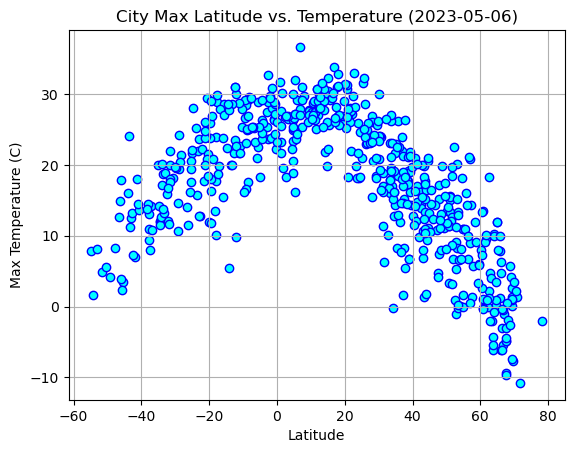

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker = "o", c = "#00FFFF", edgecolor = "b")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-05-06)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

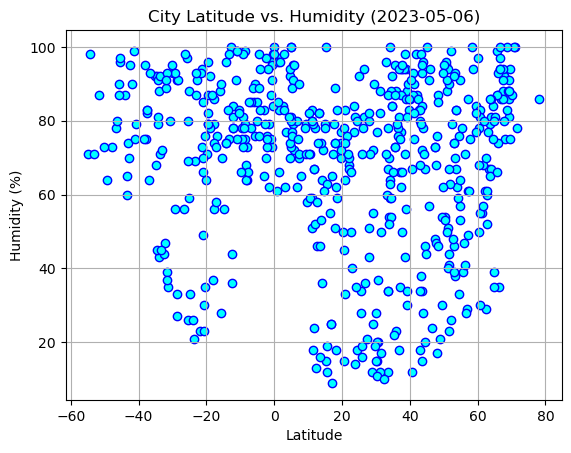

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker = "o", c ="#00FFFF", edgecolor = "b")
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-05-06)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

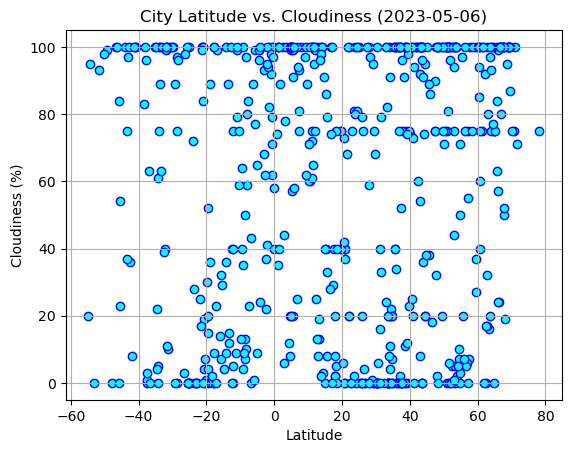

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker = "o", c ="#00FFFF", edgecolor = "b")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-05-06)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

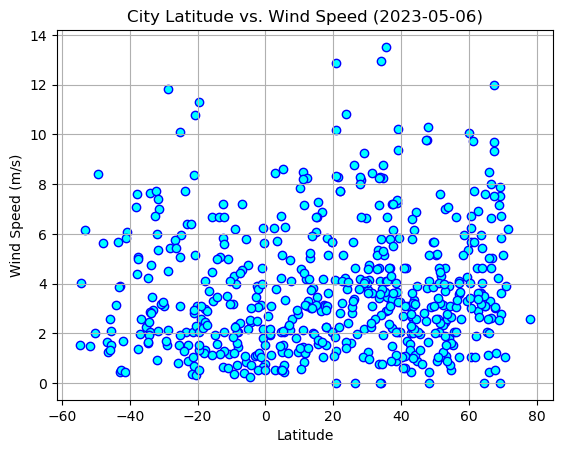

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker = "o", c ="#00FFFF", edgecolor = "b")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-05-06)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y, marker = "o", c ="#00FFFF", edgecolor = "b")
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-6.15,79,20,3.60,CA,1683514219
1,udachny,66.4167,112.4000,-3.08,35,24,3.29,RU,1683514220
2,kingston,17.9970,-76.7936,26.53,89,20,1.54,JM,1683513965
4,altar,30.7000,-111.8167,23.94,20,0,4.16,MX,1683514221
5,bethel,41.3712,-73.4140,17.05,75,100,4.63,US,1683513986


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,papatowai,-46.5619,169.4708,12.57,78,100,1.65,NZ,1683514220
8,kerikeri,-35.2268,173.9474,19.95,92,100,2.24,NZ,1683514222
9,port-aux-francais,-49.3500,70.2167,4.14,64,99,8.39,TF,1683514222
10,west island,-12.1568,96.8225,29.99,84,75,2.06,CC,1683514222
11,afaahiti,-17.7500,-149.2833,28.93,79,100,4.09,PF,1683514223


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8532038197809693


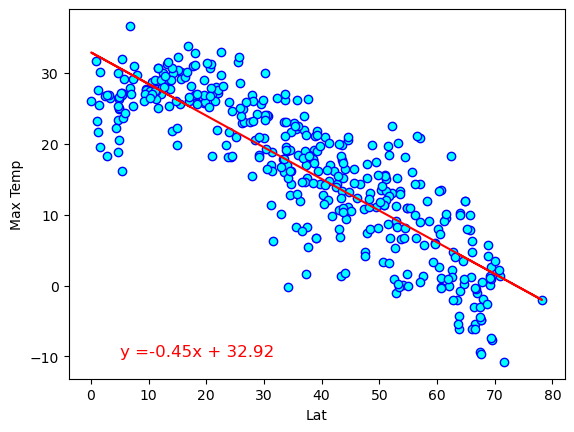

In [15]:
# Linear regression on Northern Hemisphere

linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],(5,-10))

The r-value is: 0.761490657602292


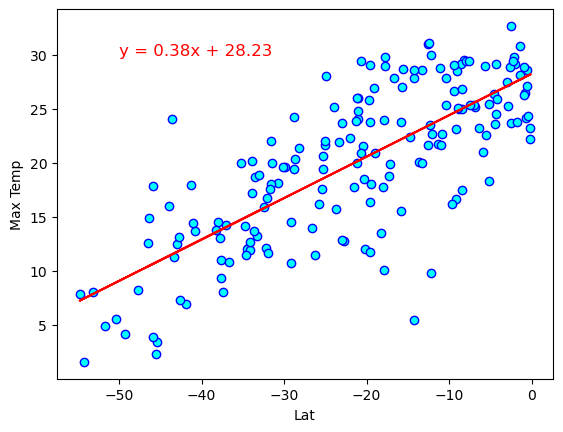

In [16]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],(-50,30))

**Discussion about the linear relationship:** There is a strong correlation between temperature and the distance to the equator. The northern hemisphere r value is negative due to the fact that the higher the latitude the lower the temperature. Whereas the southern hemisphere shows a positive r value due to the fact that the latitude is represented with negative numbers even though it is the same distance from the equator as the positive value in the northern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09778516946181423


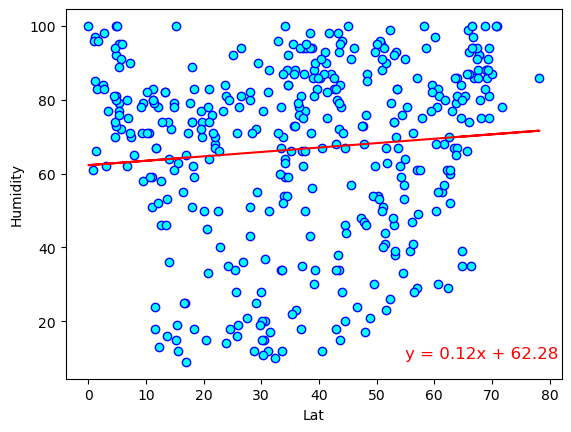

In [17]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (55, 10))

The r-value is: 0.08405451134401945


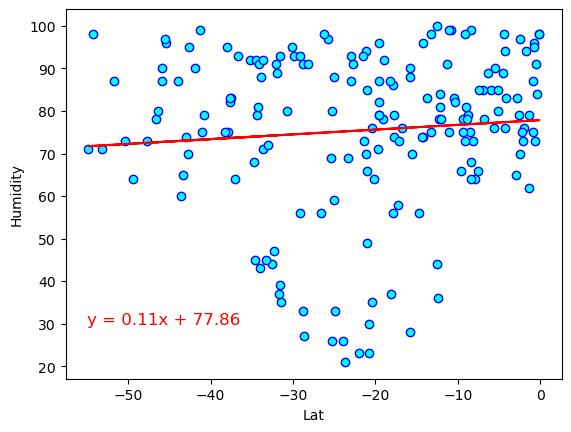

In [18]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-55, 30))

**Discussion about the linear relationship:** The correlation between humidity and latitude is very weak for both the northern and southern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09983098189392953


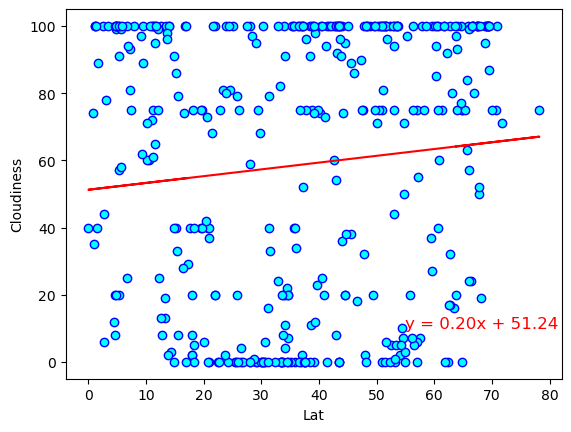

In [19]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (55, 10))

The r-value is: -0.00815372365910895


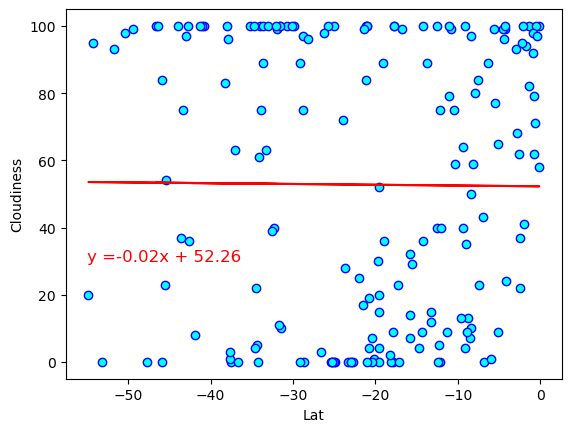

In [20]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-55, 30))

**Discussion about the linear relationship:** The correlation between latitude and cloudiness is very week for both the northern and southern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07166156089220277


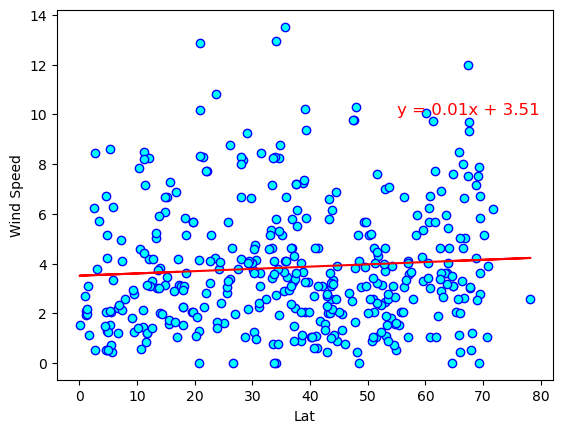

In [21]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (55, 10))

The r-value is: -0.13808657007887082


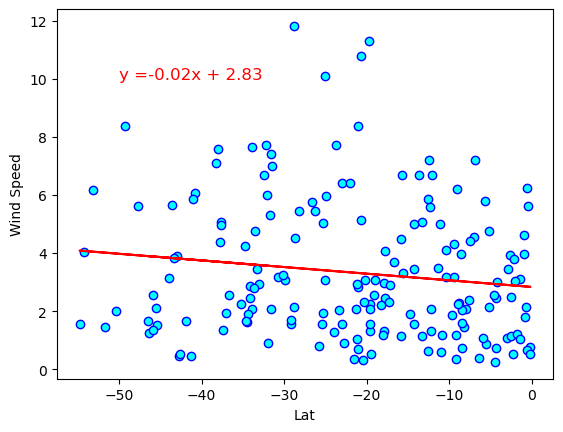

In [23]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-50, 10))

**Discussion about the linear relationship:** The correlation between wind speed and latitude for the northern hemisphere is very weak and for the southern hemisphere it is a little stronger but still weak. 